Student Name: Bedan Kung'u Njoroge
Student Pace: Part Time

### Business Problem
Syriatel is a mobile network provider in Syria. It is one of the only two providers in Syria. The stakeholders would like to reduce money lost by customers who do not stick around for long.

### Business Objective

The aim of this project is to analyze customer minutes, calls, charge and other variables to predict whether a customer will churn doing business with Syriatel or not. 


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the dataset and display first 5 rows
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Display the last 5 rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
#Display information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Data Preprocessing 1

In [6]:
#check the shape of the dataset
df.shape

(3333, 21)

In [7]:
#check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
#drop unnnecessary columns
df = df.drop(['phone number', 'account length', 'area code'], axis=1)
df.head()

,state,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
#check the datatypes
df.dtypes

state                      object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [11]:
#check for unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in international plan: ['no' 'yes']
Unique values in voice mail plan: ['yes' 'no']
Unique values in number vmail messages: [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40 48 18 17 45 16 20 14 19 51 15 11 12 47  8 44 49  4 10 13 50  9]
Unique values in total day minutes: [265.1 161.6 243.4 ... 321.1 231.1 180.8]
Unique values in total day calls: [110 123 114  71 113  98  88  79  97  84 137 127  96  70  67 139  66  90
 117  89 112 103  86  76 115  73 109  95 105 121 118  94  80 128  64 106
 102  85  82  77 120 133 135 108  57  83 129  91  92  74  93 101 146  72
  99 104 125  61 100  87 131  65 124 119  52  68 107  47 116 151 126 122
 111 145  78 136 140 148  81  55  

 ### Exploratory Data Analysis (EDA)

In EDA we will visualize the data in order to get a better understanding, check correlation and relationship between independent variables and target variable.

### Univariate Analysis

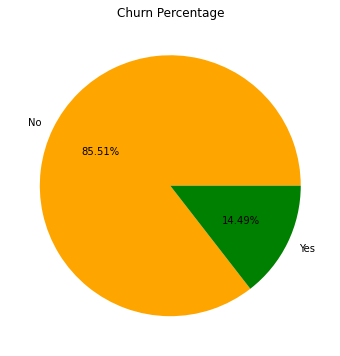

In [12]:
#pie chart for customer churn

plt.figure(figsize=(10,6))
plt.pie(df['churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%', colors=['orange', 'green'])
plt.title('Churn Percentage')
plt.show()

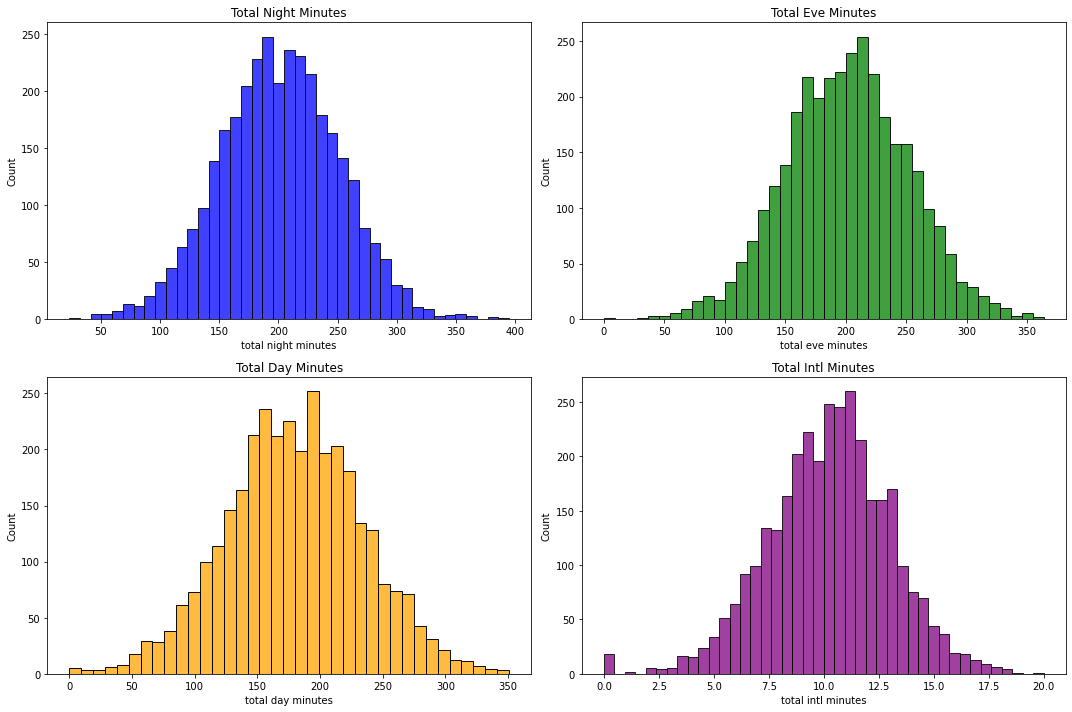

In [13]:
#Display histogram for all minutes
# Create subplots with a 2x2 grid of axes
fig, ax = plt.subplots(2,2, figsize=(15, 10))

#Display histogram for 'total night minutes'
sns.histplot(x='total night minutes', data=df, ax=ax[0,0], color='blue').set_title('Total Night Minutes')

#Display histogram for 'total eve minutes'
sns.histplot(x='total eve minutes', data=df, ax=ax[0,1], color='green').set_title('Total Eve Minutes')

#Display histogram for 'total day minutes'
sns.histplot(x='total day minutes', data=df, ax=ax[1,0], color='orange').set_title('Total Day Minutes')

#Display histogram for 'total intl minutes'
sns.histplot(x='total intl minutes', data=df, ax=ax[1,1], color='purple').set_title('Total Intl Minutes')

# Adjust layout
plt.tight_layout()

plt.show()

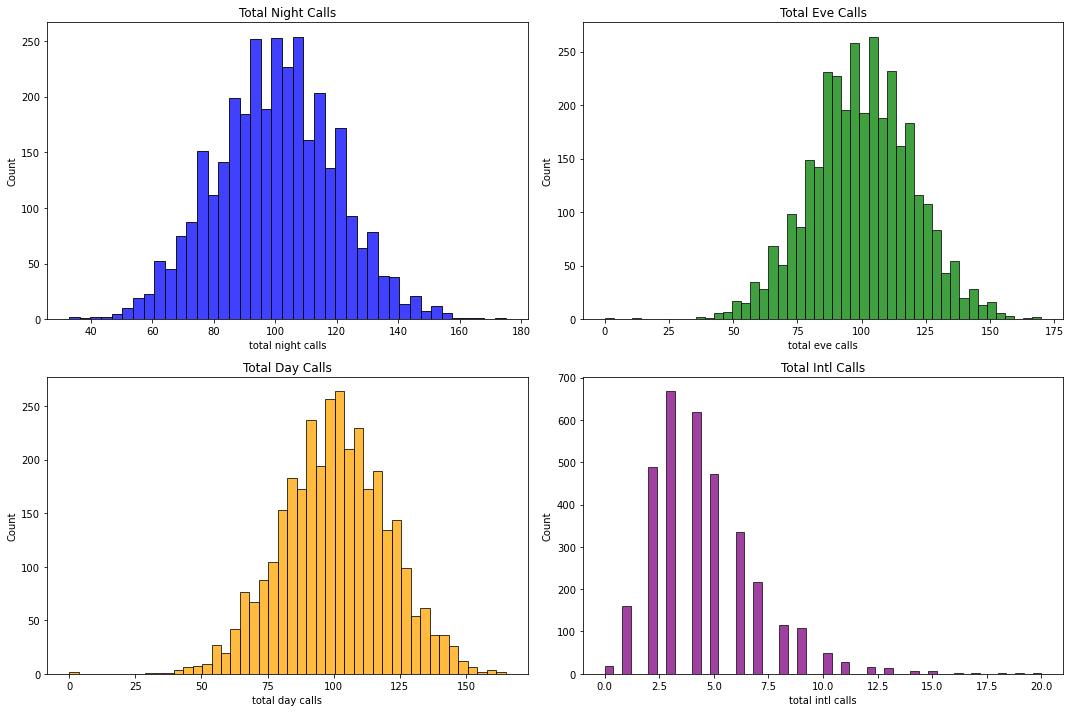

In [14]:
#Display histogram for all calls
# Create subplots with a 2x2 grid of axes
fig, ax = plt.subplots(2,2, figsize=(15, 10))

#Display histogram for 'total night calls'
sns.histplot(x='total night calls', data=df, ax=ax[0,0], color='blue').set_title('Total Night Calls')

#Display histogram for 'total eve calls'
sns.histplot(x='total eve calls', data=df, ax=ax[0,1], color='green').set_title('Total Eve Calls')

#Display histogram for 'total day calls'
sns.histplot(x='total day calls', data=df, ax=ax[1,0], color='orange').set_title('Total Day Calls')

#Display histogram for 'total intl calls'
sns.histplot(x='total intl calls', data=df, ax=ax[1,1], color='purple').set_title('Total Intl Calls')

# Adjust layout
plt.tight_layout()

plt.show()

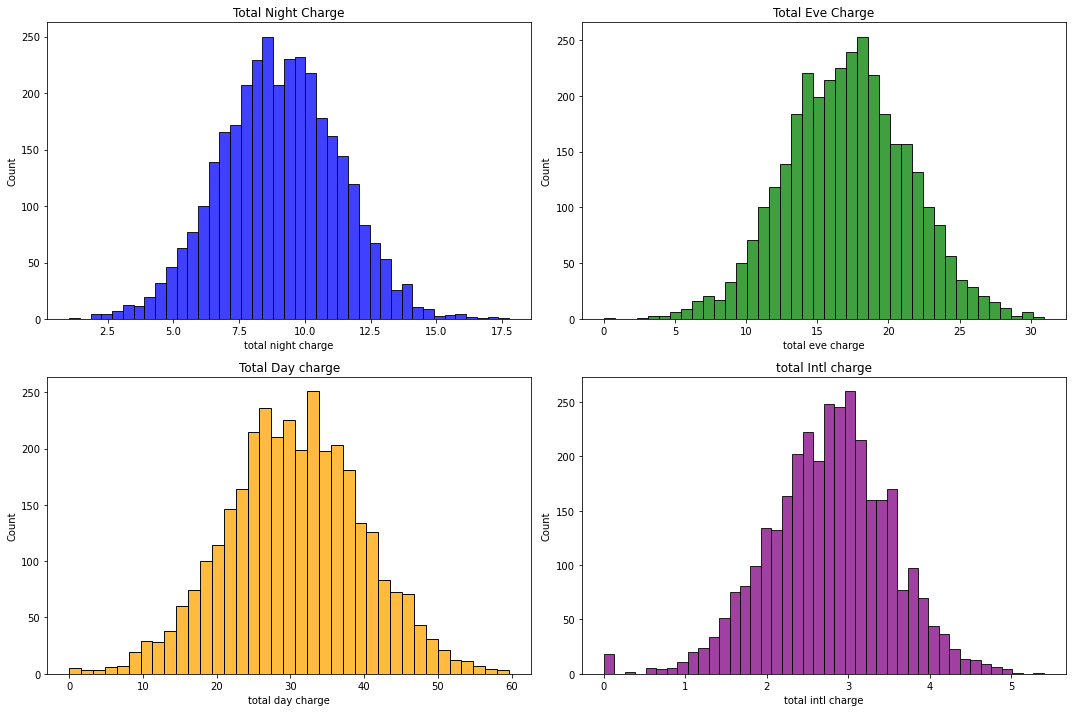

In [15]:
#Display histogram for all charges
# Create subplots with a 2x2 grid of axes
fig, ax = plt.subplots(2,2, figsize=(15, 10))

#Display histogram for 'total night charge'
sns.histplot(x='total night charge', data=df, ax=ax[0,0], color='blue').set_title('Total Night Charge')

#Display histogram for 'total eve charge'
sns.histplot(x='total eve charge', data=df, ax=ax[0,1], color='green').set_title('Total Eve Charge')

#Display histogram for 'total day charge'
sns.histplot(x='total day charge', data=df, ax=ax[1,0], color='orange').set_title('Total Day charge')

#Display histogram for 'total intl charge'
sns.histplot(x='total intl charge', data=df, ax=ax[1,1], color='purple').set_title('total Intl charge')

# Adjust layout
plt.tight_layout()

plt.show()

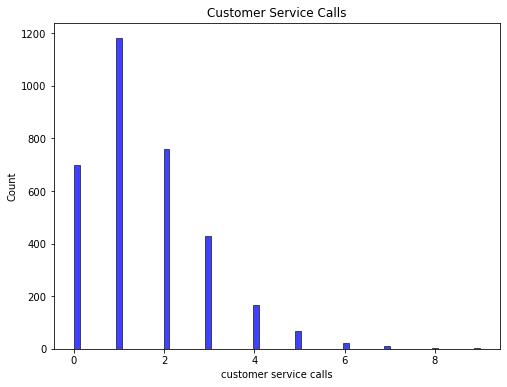

In [16]:
#Display histogram for customer service calls
# Create a subplot with a 1x1 grid of axes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#Display histogram for 'customer service calls'
sns.histplot(x='customer service calls', data=df, ax=ax, color='blue').set_title('Customer Service Calls')

plt.show()

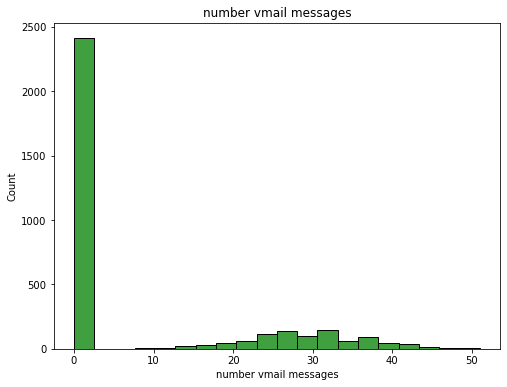

In [17]:
#Display histogram for number vmail messages 
# Create a subplot with a 1x1 grid of axes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#Display histogram for 'number vmail messages'
sns.histplot(x='number vmail messages', data=df, ax=ax, color='green').set_title('number vmail messages')

plt.show()

### Bivariate Analysis

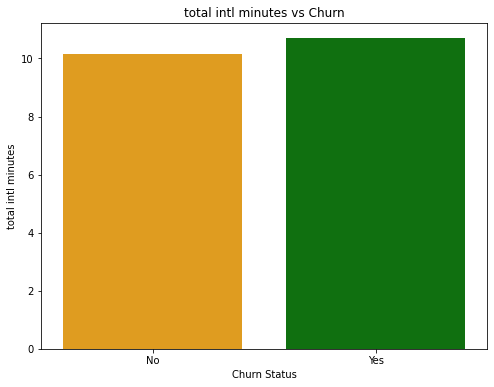

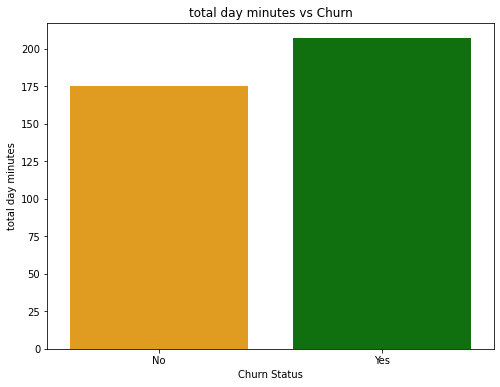

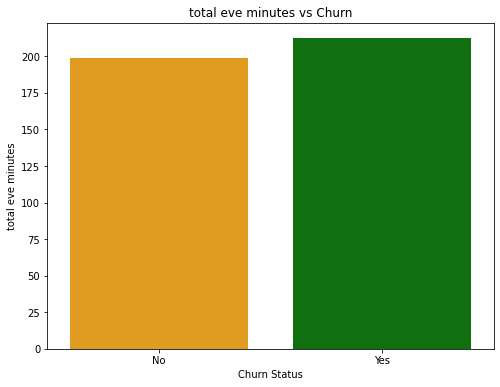

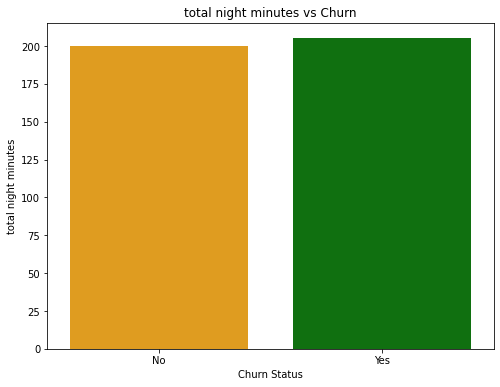

In [18]:
#Total minutes vs Churn

# Map boolean values to 'No' and 'Yes'
df['churn'] = df['churn'].map({False: 'No', True: 'Yes'})

#Display total intl minutes
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total intl minutes', data=df, ci=None, palette=['orange', 'green'])
plt.title('total intl minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total intl minutes')
plt.show()

#Display total day minutes 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total day minutes', data=df, ci=None, palette=['orange', 'green'])
plt.title('total day minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total day minutes')
plt.show()

#Display total eve minutes 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total eve minutes', data=df, ci=None, palette=['orange', 'green'])
plt.title('total eve minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total eve minutes')
plt.show()


#Display total night minutes 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total night minutes', data=df, ci=None, palette=['orange', 'green'])
plt.title('total night minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total night minutes')
plt.show()

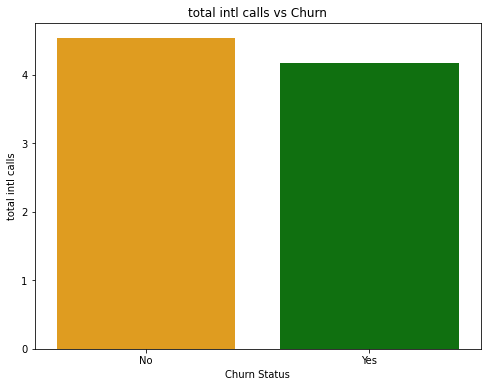

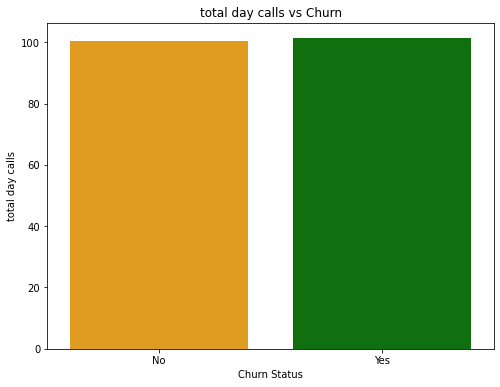

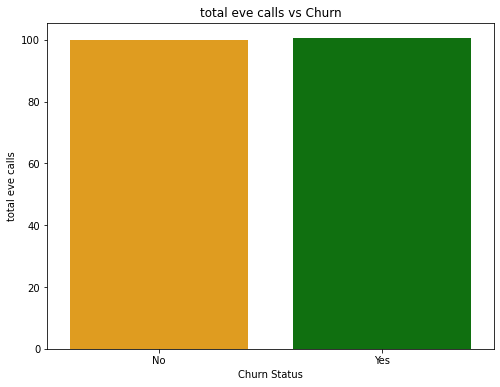

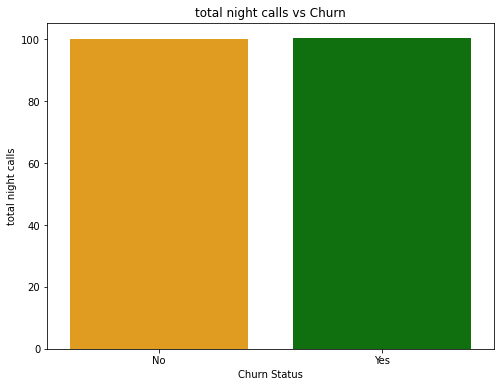

In [19]:
#Total calls vs Churn

#Display total intl calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total intl calls', data=df, ci=None, palette=['orange', 'green'])
plt.title('total intl calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total intl calls')
plt.show()

#Display total day calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total day calls', data=df, ci=None, palette=['orange', 'green'])
plt.title('total day calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total day calls')
plt.show()

#Display total eve calls 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total eve calls', data=df, ci=None, palette=['orange', 'green'])
plt.title('total eve calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total eve calls')
plt.show()


#Display total night calls 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total night calls', data=df, ci=None, palette=['orange', 'green'])
plt.title('total night calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total night calls')
plt.show()

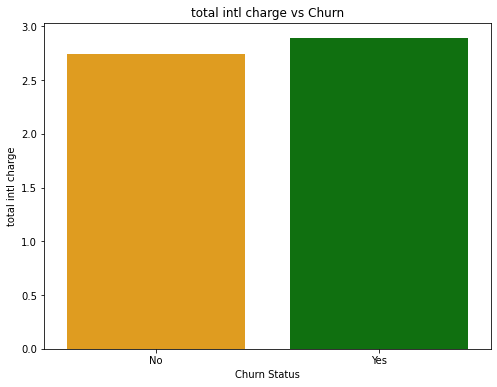

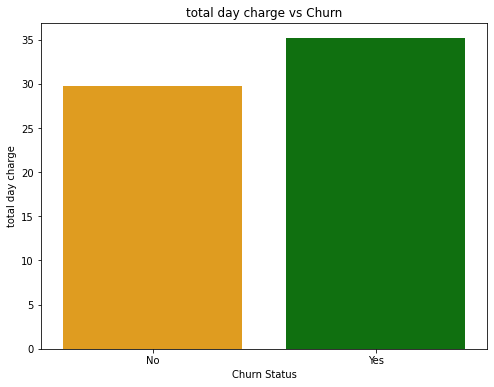

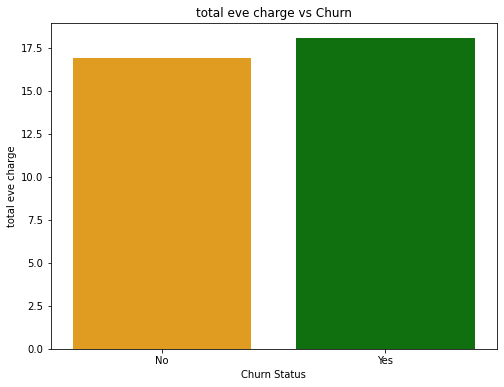

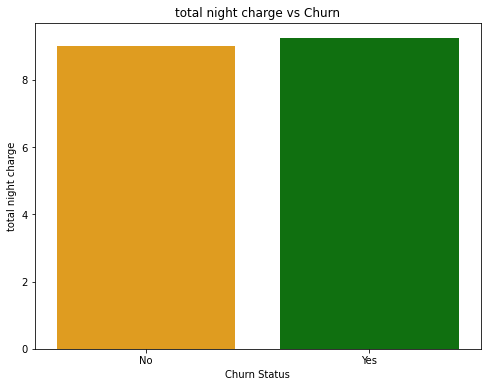

In [20]:
#Total charge vs Churn

#Display total intl charge
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total intl charge', data=df, ci=None, palette=['orange', 'green'])
plt.title('total intl charge vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total intl charge')
plt.show()

#Display total day charge
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total day charge', data=df, ci=None, palette=['orange', 'green'])
plt.title('total day charge vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total day charge')
plt.show()

#Display total eve charge 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total eve charge', data=df, ci=None, palette=['orange', 'green'])
plt.title('total eve charge vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total eve charge')
plt.show()


#Display total night charge 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total night charge', data=df, ci=None, palette=['orange', 'green'])
plt.title('total night charge vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total night charge')
plt.show()

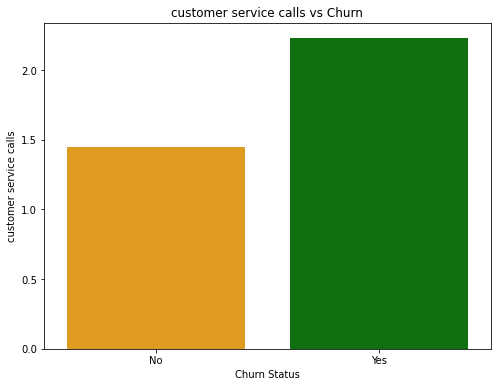

In [21]:
#Customer service calls vs churn status

#Display customer service calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='customer service calls', data=df, ci=None, palette=['orange', 'green'])
plt.title('customer service calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('customer service calls')
plt.show()

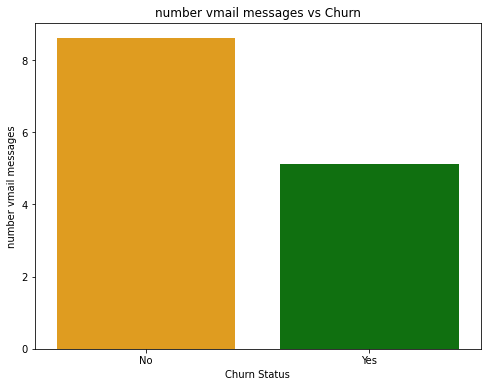

In [22]:
#number vmail messages vs churn status

#Display customer service calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='number vmail messages', data=df, ci=None, palette=['orange', 'green'])
plt.title('number vmail messages vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('number vmail messages')
plt.show()

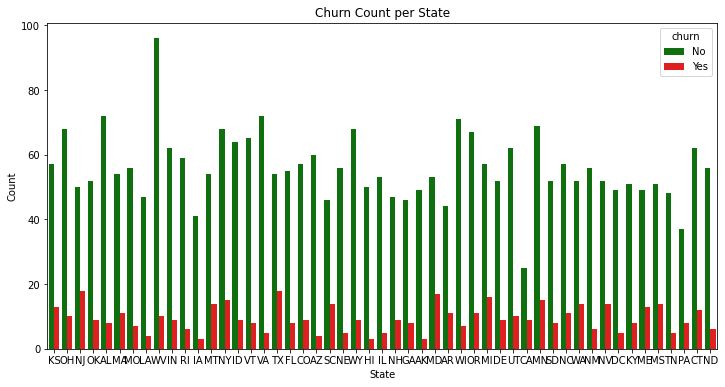

In [23]:
#State vs Churn

# Create a bar plot for churn count per state
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='churn', data=df, palette={'Yes': 'red', 'No': 'green'})
plt.title('Churn Count per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [24]:
df.columns

Index(['state', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

### Data Preprocessing 2

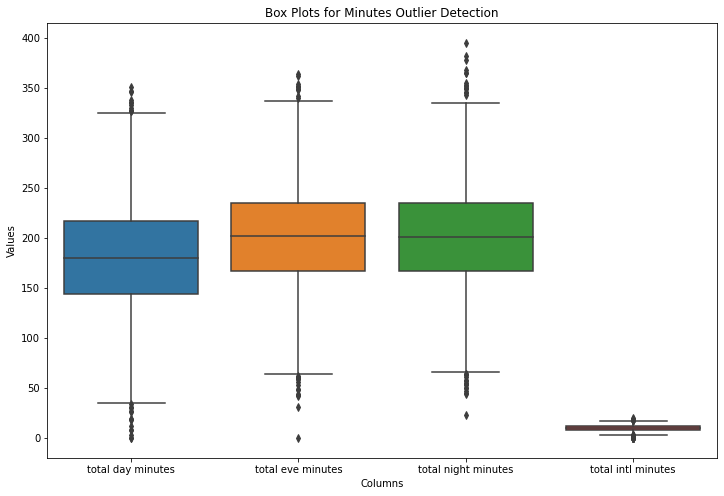

In [25]:
# Check for outliers
# Create box plots to check for outliers in total minutes
plt.figure(figsize=(12, 8))
df_minutes = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']]
sns.boxplot(data=df_minutes)
plt.title('Box Plots for Minutes Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [26]:
# Identifying outliers using IQR
def IQR_outliers(data, column):
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    return outliers, Q1, Q3, IQR

In [27]:
total_day_minutes_outliers = IQR_outliers(df, 'total day minutes')
total_day_minutes_outliers[0]

[332.9,
 337.4,
 326.5,
 350.8,
 335.5,
 30.9,
 34.0,
 334.3,
 346.8,
 12.5,
 25.9,
 0.0,
 0.0,
 19.5,
 329.8,
 7.9,
 328.1,
 27.0,
 17.6,
 326.3,
 345.3,
 2.6,
 7.8,
 18.9,
 29.9]

In [28]:
#Removing and dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    # get values from previous function
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return df

In [29]:
# Removing outliers simultaneously
for i in df_minutes:
  df = IQR_remove_outliers(df, i)

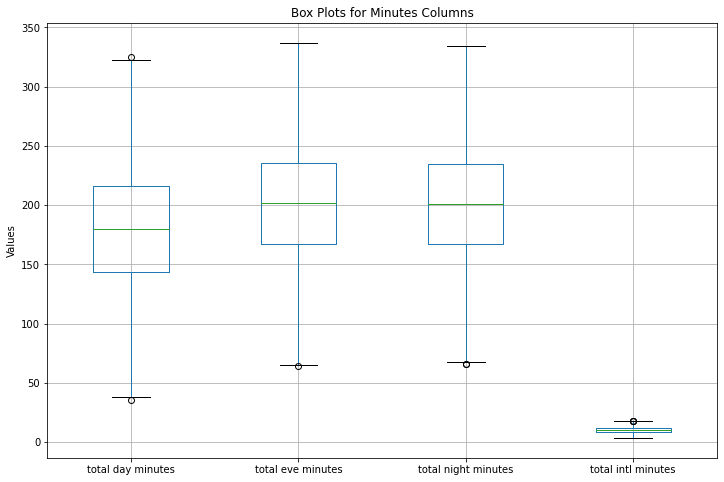

In [30]:
# Box plot to show cleaned data
columns_to_plot = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Minutes Columns')
plt.ylabel('Values')
plt.show()

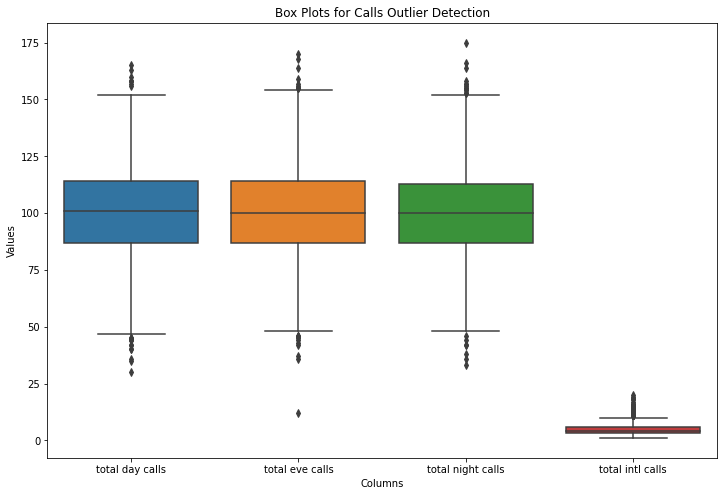

In [31]:
# Create box plots to check for outliers in total calls
plt.figure(figsize=(12, 8))
df_calls = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']]
sns.boxplot(data=df_calls)
plt.title('Box Plots for Calls Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [32]:
# Removing outliers simultaneously
for i in df_calls:
  df = IQR_remove_outliers(df, i)

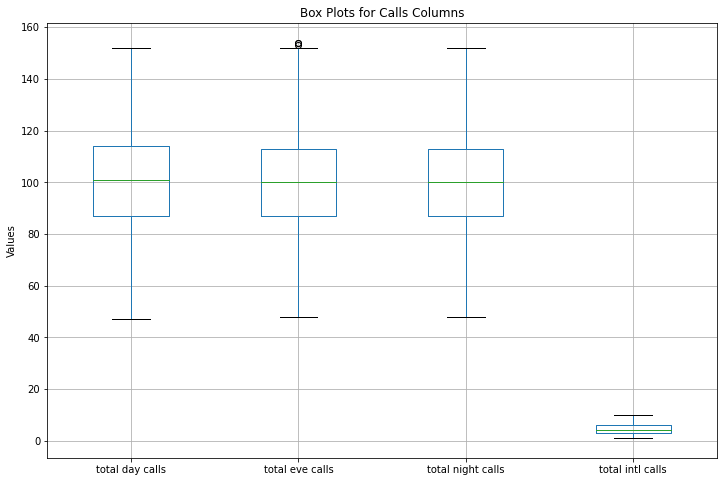

In [33]:
# Box plot to show cleaned data
columns_to_plot = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Calls Columns')
plt.ylabel('Values')
plt.show()

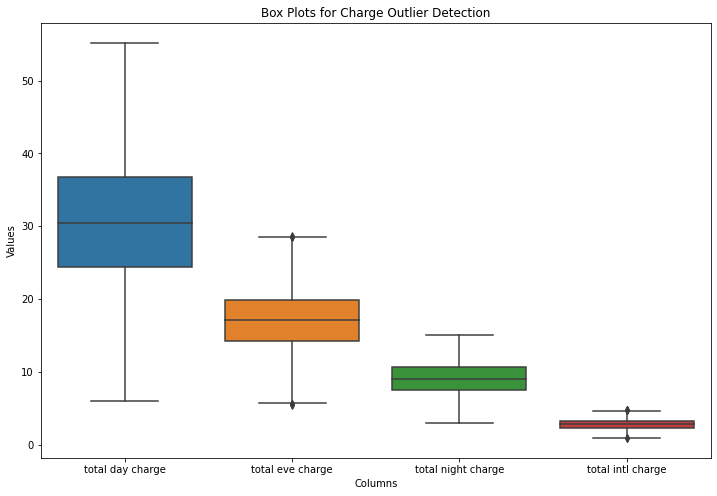

In [34]:
# Create box plots to check for outliers in total charge
plt.figure(figsize=(12, 8))
df_charge = df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']]
sns.boxplot(data=df_charge)
plt.title('Box Plots for Charge Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [35]:
# Removing outliers simultaneously
for i in df_charge:
  df = IQR_remove_outliers(df, i)

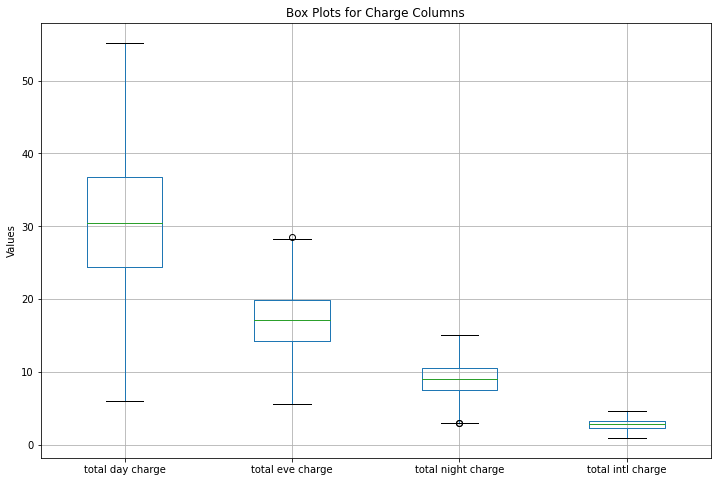

In [36]:
# Box plot to show cleaned data
columns_to_plot = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Charge Columns')
plt.ylabel('Values')
plt.show()

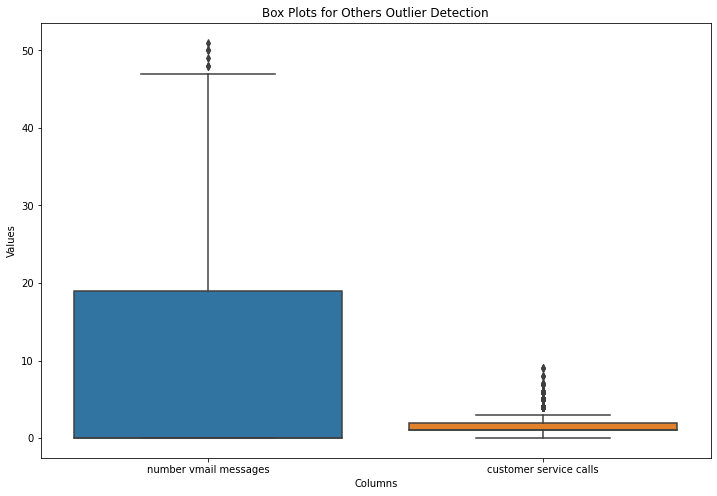

In [37]:
# Check for outliers
# Create box plots to check for outliers in total charge
plt.figure(figsize=(12, 8))
df_other = df[['number vmail messages', 'customer service calls']]
sns.boxplot(data=df_other)
plt.title('Box Plots for Others Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [38]:
# Removing outliers simultaneously
for i in df_other :
  df = IQR_remove_outliers(df, i)

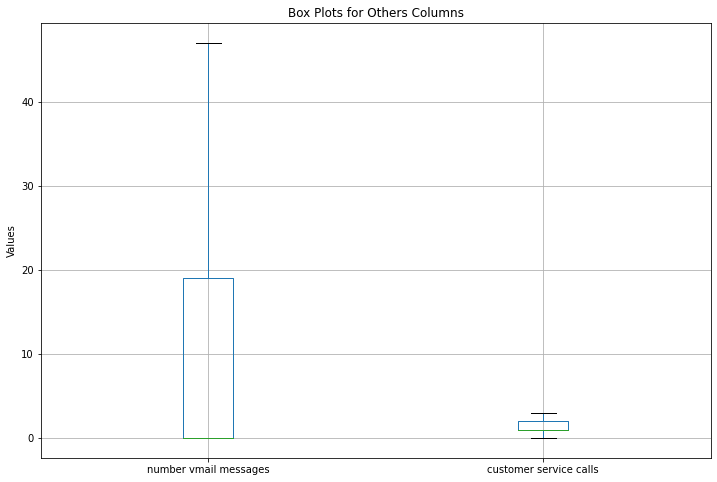

In [39]:
# Box plot to show cleaned data
columns_to_plot = ['number vmail messages', 'customer service calls']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Others Columns')
plt.ylabel('Values')
plt.show()

In [40]:
df.columns

Index(['state', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

#columns to label encode
cols = df.columns[df.dtypes == 'object']

#Label encoder object
le = LabelEncoder()

#Label encoding the columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

state [16 35 31 36  1 24 49 39 12 26 13 46 45 43  9 40 29 50 11 14 30  3 10  0
 19  2 48 37 22  8 15 44  5  4 23 41 27 47 32 33  7 20 17 18 21 25 42 38
  6 34 28] 

international plan [0 1] 

voice mail plan [1 0] 

churn [0 1] 



In [42]:
df.dtypes

state                       int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

#Standardizing the data
sc = StandardScaler()
cols_scale = df[['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 
                 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 
                 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']]
cols_scale = sc.fit_transform(cols_scale)

### Correlation Matrix Heatmap

<AxesSubplot:>

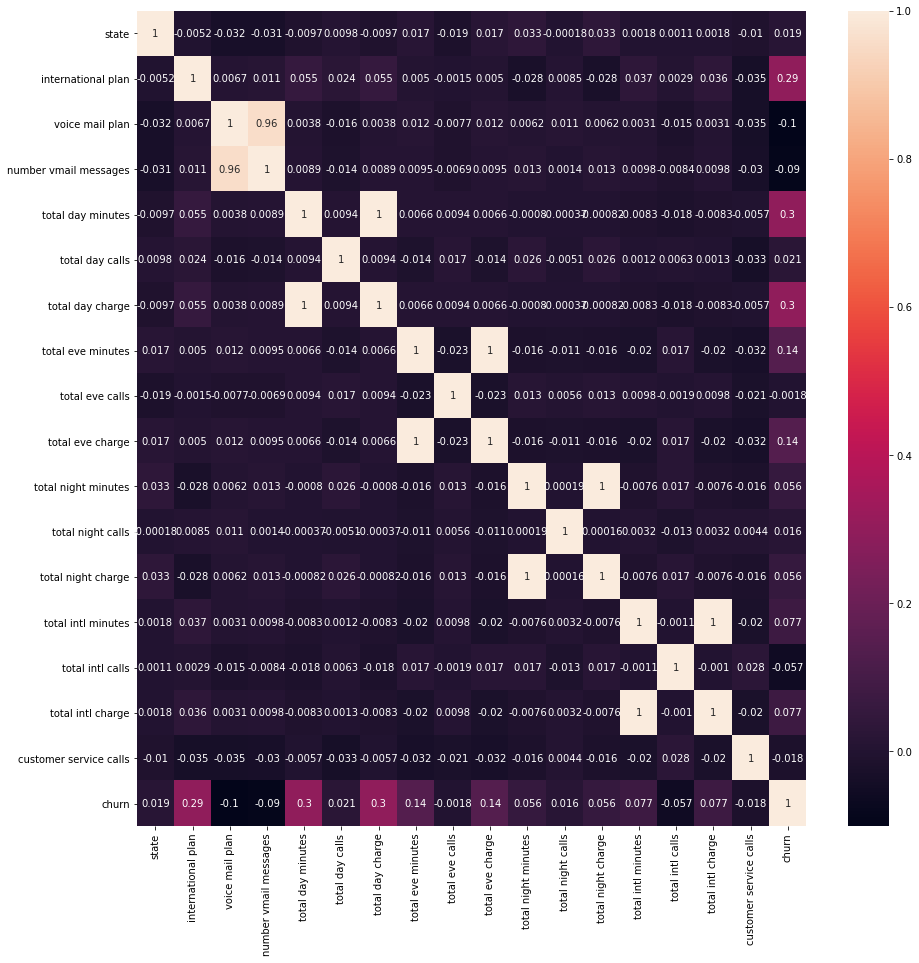

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [45]:
#check for class imbalance
print(df['churn'].value_counts())

0    2500
1     307
Name: churn, dtype: int64


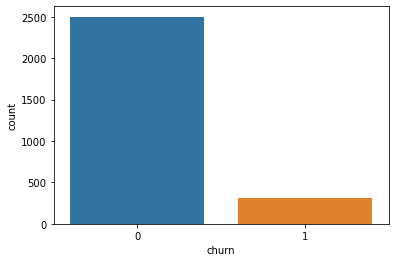

In [46]:
#Visualize the class imbalance
sns.countplot(x='churn', data=df)
plt.show()

In [47]:
class_proportions = df['churn'].value_counts(normalize=True)
print(class_proportions)

0    0.890631
1    0.109369
Name: churn, dtype: float64


In [48]:
imbalance_ratio = class_proportions[0] / class_proportions[1]
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 8.143322475570033


In [49]:
#Defining X and y
X = df.drop('churn', axis=1)
y = df['churn']

In [50]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Instantiate SMOTE
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(sampling_strategy='minority', random_state=42)

# Fit and apply the oversampling to the training set
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Create a DataFrame for visualization with all variables
df_resampled_all = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.DataFrame({'churn': y_resampled})], axis=1)

Text(0.5, 1.0, 'Balanced Class Distribution after Oversampling')

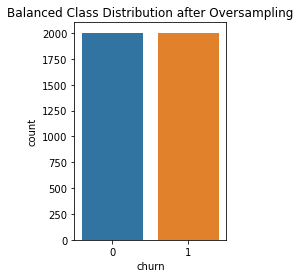

In [52]:
# Plot the balanced class distribution after oversampling
plt.subplot(1, 2, 2)
sns.countplot(x='churn', data=df_resampled_all)
plt.title('Balanced Class Distribution after Oversampling')

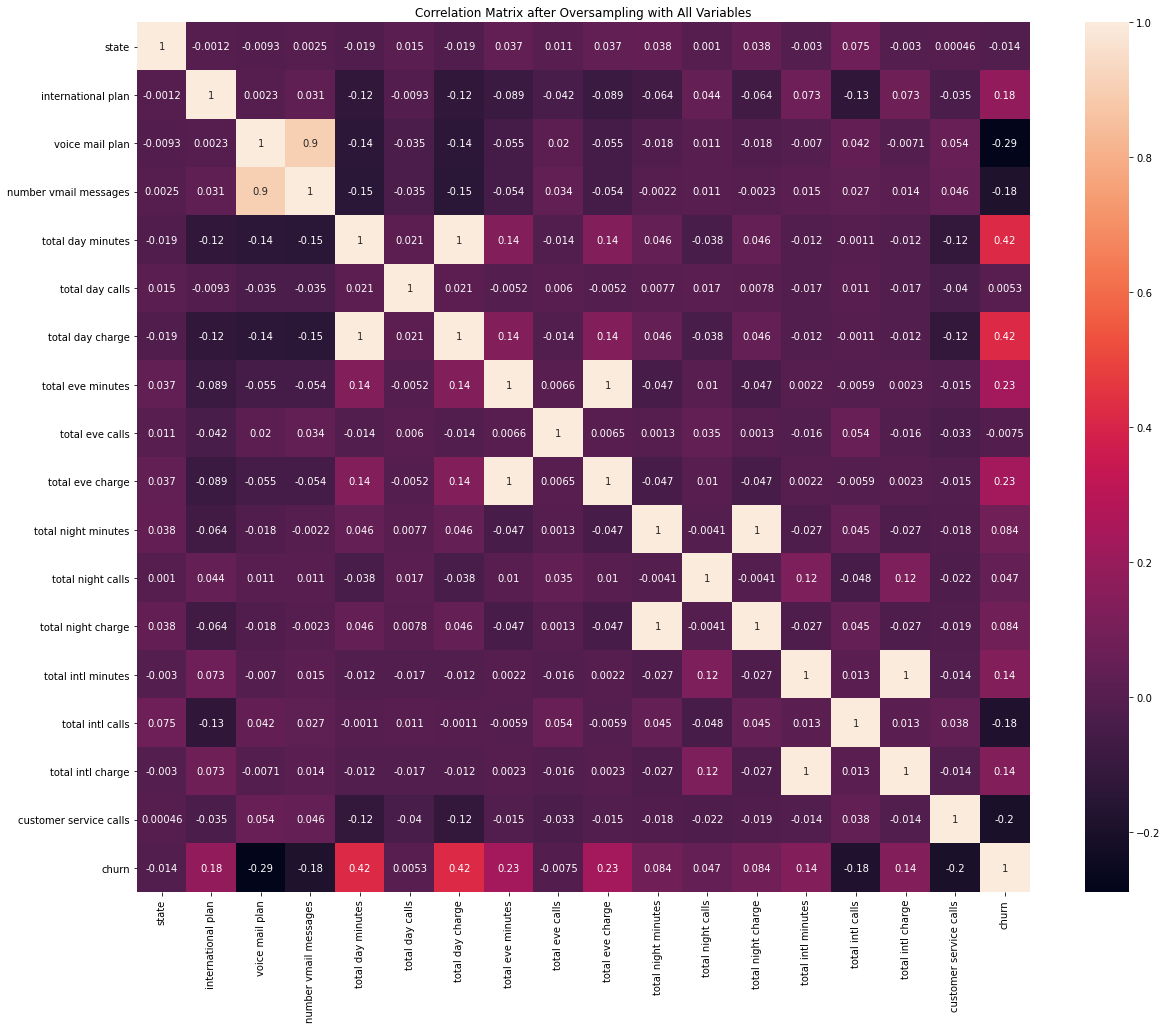

In [53]:
# Display correlation of our balanced data with all variables
plt.figure(figsize=(20, 16))
sns.heatmap(df_resampled_all.corr(), fmt='.2g', annot=True)
plt.title('Correlation Matrix after Oversampling with All Variables')

plt.show()

### Model Building

We will use the following models to predict customer churn
1. Logistic Regression
2. Decision Trees 
3. K Nearest Neighbours

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [55]:
# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


# Create logistic regression model
logreg = LogisticRegression()

# Perform grid search with cross-validation
log_model = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
log_model.fit(X_train, y_train)

# Get the best parameters
best_params = log_model.best_params_

# Use the best model to make predictions on the test set
l_pred = log_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, l_pred)*100,2), "%")

#l_pred = log_model.predict(X_test)


#accuracy = accuracy_score(y_test, l_pred)

#print(f'Best Parameters: {best_params}')
#print(f'Accuracy: {accuracy}')


C:\Users\Bedan\miniconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bedan\miniconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\Bedan\miniconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bedan\miniconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Accuracy Score: 88.97 %


### Decision Trees

In [56]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
clf  = DecisionTreeClassifier()

### Hyperparameter tuning using GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 0}


In [58]:
from sklearn.metrics import accuracy_score
from sklearn import tree

#Decision Tree Classifier Object with best parameters
clf  = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=8, min_samples_split=2, random_state=0)

#Fitting the data
clf.fit(X_train, y_train)

#Predicting the values
d_pred = clf.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, d_pred)*100,2), "%")


#Training accuracy
#print('Training Accuracy: ', clf.score(X_train, y_train))

#Predicting the values
#d_pred = clf.predict(X_test)

#print('Accuracy:', accuracy_score(y_test, d_pred))

Accuracy Score: 95.2 %


### K Nearest Neighbours

In [59]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

### Hyperparameter tuning using GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'n_neighbors': [2,4,6,8,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#Grid Search Object with KNN Classifier
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [61]:
#KNN Classifier Object with best parameters
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='distance')

#Fitting the data
knn.fit(X_train, y_train)

#Training accuracy
#print('Training Accuracy: ', knn.score(X_train, y_train))

#Predicting the values
#k_pred = knn.predict(X_test)

k_pred = knn.predict(X_test)
print("Accuracy Score:", round(accuracy_score(y_test, k_pred)*100,2), "%")

#print('Accuracy:', accuracy_score(y_test, k_pred))

Accuracy Score: 92.17 %


### Model Evaluation

Text(0.5, 1.0, 'KNN Confusion Matrix')

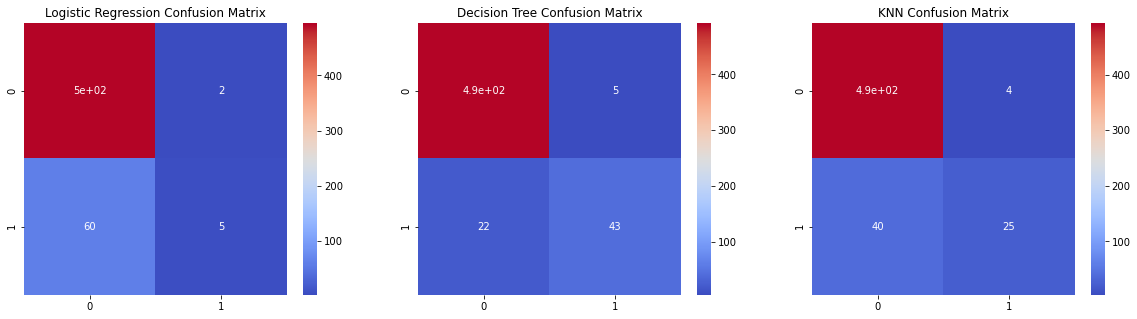

In [62]:
#Confusion Matrix HeatMap

from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

#Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, ax=ax[0], cmap='coolwarm').set_title('Logistic Regression Confusion Matrix')

#Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[1], cmap='coolwarm').set_title('Decision Tree Confusion Matrix')

#KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, k_pred), annot=True, ax=ax[2], cmap='coolwarm').set_title('KNN Confusion Matrix')

### Distribution Plot

C:\Users\Bedan\miniconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bedan\miniconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bedan\miniconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

<AxesSubplot:title={'center':'KNN'}, xlabel='churn', ylabel='Density'>

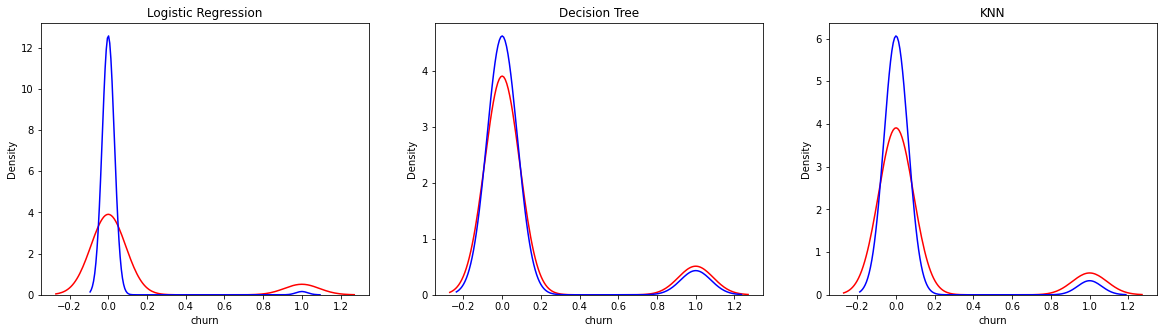

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))


#Logistic Regression
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Logistic Regression')
sns.distplot(l_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0])

#Decision Tree 
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1]).set_title('Decision Tree')
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1])

#KNN
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[2]).set_title('KNN')
sns.distplot(k_pred, hist=False, color="b", label="Fitted Values" , ax=ax[2])

### Classification Report

In [64]:
from sklearn.metrics import classification_report

print('Logistic Regression Classification Report: \n', classification_report(y_test, l_pred))

print('Decision Tree Classification Report: \n', classification_report(y_test, d_pred))

print('KNN Classification Report: \n', classification_report(y_test, k_pred))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       497
           1       0.71      0.08      0.14        65

    accuracy                           0.89       562
   macro avg       0.80      0.54      0.54       562
weighted avg       0.87      0.89      0.85       562

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       497
           1       0.90      0.66      0.76        65

    accuracy                           0.95       562
   macro avg       0.93      0.83      0.87       562
weighted avg       0.95      0.95      0.95       562

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       497
           1       0.86      0.38      0.53        65

    accuracy                           0.92       562
   macro avg   

### Model Metrics

Text(0.5, 1.0, 'F1 Score')

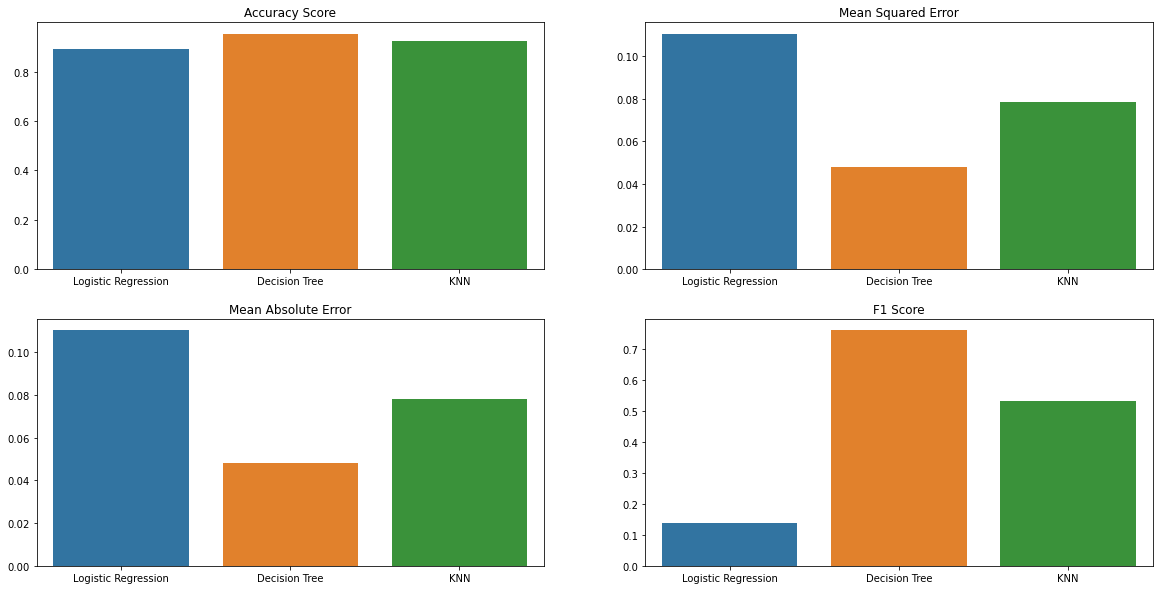

In [65]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score

#Bar plots
fig, ax = plt.subplots(2,2, figsize=(20, 10))

#Accuracy Score
sns.barplot(x = ['Logistic Regression', 'Decision Tree', 'KNN'], y = [accuracy_score(y_test, l_pred), accuracy_score(y_test, d_pred), accuracy_score(y_test, k_pred)], ax=ax[0,0]).set_title('Accuracy Score')

#Mean Squared Error
sns.barplot(x = ['Logistic Regression','Decision Tree','KNN'], y = [mean_squared_error(y_test, l_pred), mean_squared_error(y_test, d_pred), mean_squared_error(y_test, k_pred)], ax=ax[0,1]).set_title('Mean Squared Error')

#Mean Absolute Error
sns.barplot(x = ['Logistic Regression','Decision Tree','KNN'], y = [mean_absolute_error(y_test, l_pred), mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, k_pred)], ax=ax[1,0]).set_title('Mean Absolute Error')

#F1 Score
sns.barplot(x = ['Logistic Regression','Decision Tree', 'KNN'], y = [f1_score(y_test, l_pred), f1_score(y_test, d_pred), f1_score(y_test, k_pred)], ax=ax[1,1]).set_title('F1 Score')

These graphs compares the models based on the metrics such as accuracy score, mean squared error, mean absolute error and f1 score. The Decision Tree Classifier has the highest accuracy score and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Decision Tree Classifier is a good fit for predicting the customer churn.

### Feature Importance

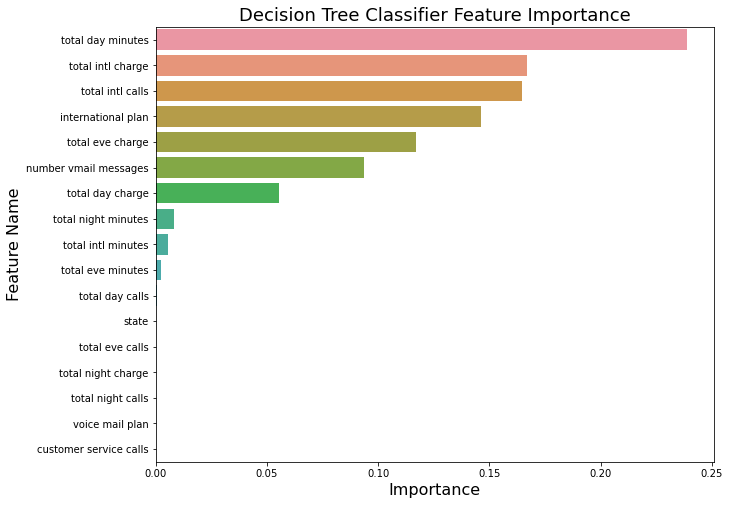

In [66]:
# Decision Tree Classifier Feature Importance
imp_df = pd.DataFrame({ "Feature Name": X_train.columns,
"Importance": clf.feature_importances_})
fi= imp_df.sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x= 'Importance', y= 'Feature Name')
plt.title('Decision Tree Classifier Feature Importance', fontsize=18)
plt.xlabel( 'Importance', fontsize=16)
plt.ylabel( 'Feature Name', fontsize=16)
plt.show()


From the Decision Tree Classifier Feature Importance we can see that total day minutes, total int charge, total intl calls are the most important features for predicting customer churn.Therefore, the company should focus on these features to reduce the customer churn.

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [68]:
y_pred_proba = clf.predict_proba(X_test)[:][:,1]
churn_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual'])])
churn_actual_predicted.index=y_test.index

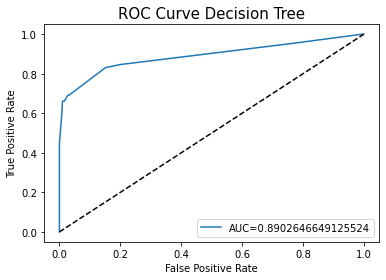

In [69]:
fpr,tpr,_= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree', size=15)
plt.legend(loc=4)

In [70]:
y2_pred_proba = knn.predict_proba(X_test)[:][:,1]
churn_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual'])])
churn_actual_predicted.index=y_test.index

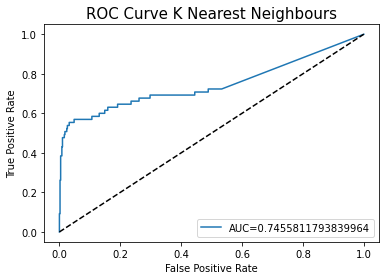

In [71]:
fpr,tpr,_= metrics.roc_curve(y_test, y2_pred_proba)
auc = metrics.roc_auc_score(y_test, y2_pred_proba)
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve K Nearest Neighbours', size=15)
plt.legend(loc=4)

The Decision Tree model is performing relatively well with a higher AUC, indicating strong discriminatory power. The KNN model has a lower AUC but is still acceptable.

### XGBoost

In [72]:
!pip install xgboost

In [73]:
from xgboost import XGBClassifier

# Create XGBClassifier
xgbc = XGBClassifier(
    max_depth=9,
    min_samples_leaf=10,
    min_samples_split=2,
    max_features='sqrt',
    random_state=0
)

# Fit the model
xgbc.fit(X_train, y_train)

[14:54:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              max_features='sqrt', min_child_weight=1, min_samples_leaf=10,
              min_samples_split=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred = xgbc.predict(X_test)
print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100,2), "%")

Accuracy Score: 97.33 %


In [75]:
from sklearn.metrics import f1_score, precision_score, recall_score, jaccard_score, log_loss


print("F-1 Score:", (f1_score(y_test, y_pred, average='micro')))
print("Precision Score:", (precision_score(y_test, y_pred, average='micro')))
print("Recall Score:", (recall_score(y_test, y_pred, average='micro')))
print("Jaccard Score:", (jaccard_score(y_test, y_pred, average='micro')))
print("Log Loss:", (log_loss(y_test, y_pred)))

F-1 Score: 0.9733096085409253
Precision Score: 0.9733096085409253
Recall Score: 0.9733096085409253
Jaccard Score: 0.9480069324090121
Log Loss: 0.9620192185707428


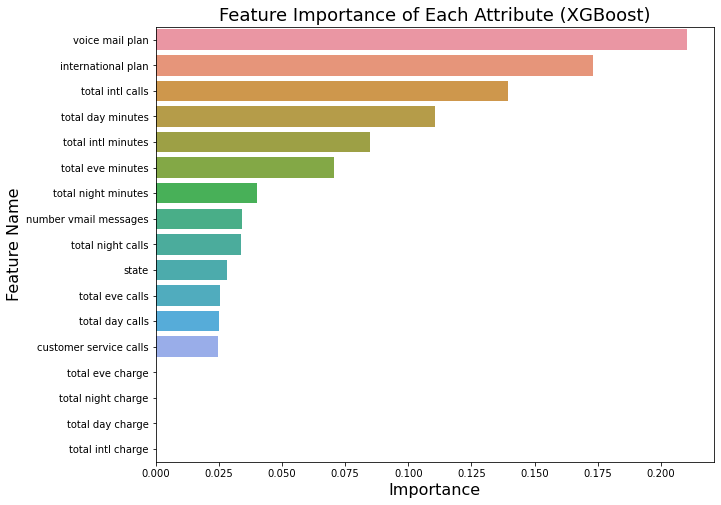

In [76]:
imp_df = pd.DataFrame({ "Feature Name": X_train.columns,
"Importance": xgbc.feature_importances_})
fi= imp_df.sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x= 'Importance', y= 'Feature Name')
plt.title('Feature Importance of Each Attribute (XGBoost)', fontsize=18)
plt.xlabel( 'Importance', fontsize=16)
plt.ylabel( 'Feature Name', fontsize=16)
plt.show()

In [77]:
cm = confusion_matrix (y_test, y_pred)
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

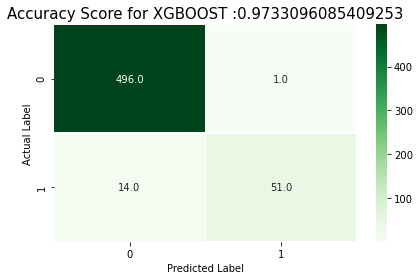

In [78]:
sns.heatmap ( data=cm,linewidths=.5, fmt='.1f', annot=True, cmap='Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for XGBOOST :{0}'.format (xgbc.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.tight_layout()

In [79]:
y_pred_proba = xgbc.predict_proba(X_test)[:][:,1]
churn_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual'])])
churn_actual_predicted.index=y_test.index
churn_actual_predicted

,y_actual
2830,0
3170,0
1893,1
2968,1
2188,0
...,...
2580,0
3316,0
786,0
1302,1


In [80]:
fpr,tpr,_= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

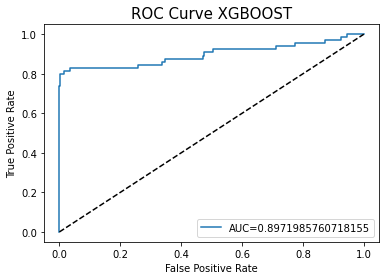

In [81]:
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBOOST', size=15)
plt.legend(loc=4)

### Conclusion

From the Exploratory Data Analysis(EDA), we can see that customers with high international calls are less likely to churn as compared to total day calls, total eve calls, and total night calls. The company should then promote more international calls.
Customers with high number of minutes used during the day are more likely to churn. Morever, customers with a high charge on day time usage are more likely to churn. The company should focus on lowering charges charged during the day.
Customers who made more customer service calls are more likely to churn. The company should therefore focus on resolving complains made by customers.
Customers with high number of voice mails are less likely to churn. The company should encourage customers to use voice mails.
The Decision Tree model had the highest accuracy score and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Decision Tree Classifier is a good fit for predicting the customer churn.
From the Decision Tree Classifier Feature Importance we can see that total day minutes, total int charge, total intl calls are the most important features for predicting customer churn.Therefore, the company should focus on these features to reduce the customer churn.
The Decision Tree model is performing relatively well with a higher AUC, indicating strong discriminatory power. The KNN model has a lower AUC but is still acceptable.
After using XGBoost to increase our model performance the AUC increased a little from 0.890 to 0.897 and an accuracy score 97.33% in comparison to Decision Tree with an accuracy score of 95.2%.